In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Solution
\begin{align}
 x=&-\frac{1}{2} g t^2+v_0 t \,, & v=&-g t +v_0
\end{align}
At maximum height $t=t_{\text{end}}/2$ and
\begin{align}
 x_{\text{max}}=&-\frac{1}{2} g (t_{\text{end}}/2)^2+v_0 \frac{t_{\text{end}}}{2} \,, & 0=&-g \frac{t_{\text{end}}}{2} +v_0
\end{align}
From the second equation $v_0=g t_{\text{end}}/2=14.7$ m/s, and
\begin{align}
 x_{\text{max}}=&-\frac{1}{2} g (t_{\text{end}}/2)^2+ g \frac{t_{\text{end}}}{2} \frac{t_{\text{end}}}{2} \nonumber\\
 =&g\frac{ t_{\text{end}}^2  }{8}=11.025\ \text{m}\,.
\end{align}

__Activity__: Find the same solution by fitting the polynomial of degree 2 that go trough the points: 

$(t_0, x_0)=(0,0)$,

$t_{\rm end/2},x_{\rm max}=(1.5,11,025)$,

$t_{\rm end/2},x_{\rm max} =(0,3)$

In [18]:
df=pd.DataFrame({
    "t":[0,1.5,3],
    "x":[0,11.025,0]
})
df

,t,x
0,0.0,0.000
1,1.5,11.025
2,3.0,0.000


In [19]:

coeff=np.polyfit(df.t,df.x,deg=2)
x=np.poly1d(coeff,variable="t")
print(x)

      2
-4.9 t + 14.7 t + 8.205e-15


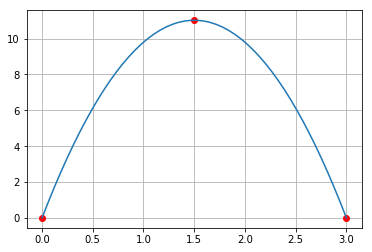

In [25]:
t=np.linspace(df.t.min(),df.t.max())
plt.plot(df.t,df.x,"ro")
plt.plot(t,x(t))
plt.grid()


<div style="float: right;" markdown="1">
    <img src="figures/leastaction.png">
</div>

## Geometry interpretation
Following the geometry theory developed [here](http://www.eftaylor.com/software/ActionApplets/LeastAction.html), we will try to define something called the _Action_ for one small segment of the free fall movement in one-dimension. 

For that we need the experimental data consisting on the height of an object of mass $m$ in free fall, and the height $x_i$, for each time $t_i$. This data would be fitted by a polynomial of degree two, as displayed in the figure for one of the fitted segments of the plot of $x$ as a function of $t$. We take the origin of the coordinates at ground level. For each segment we can calculate an average kinetic energy, $T$, and an averge potential energy, $V$, in the limit of $\Delta t=t_2-t_1$ small. From the figure

\begin{align}
T_{12}=\frac12 m v^2\approx &\frac12 m\left(\frac{x_2-x_1}{t_2-t_1}\right)^2\,,&
V_{12}=mgh\approx& m g \frac{x_2+x_1}{2}\,.
\end{align}

We can then reformulate the problem of the free fall in the following terms. From all the possible curves that can interpolate the points $(t_1,x_1)$ and $(t_2,x_2)$, which is the correct one?. 

The answer obtained by Euler can be obtained from the definition of the function "Lagrangian"
$$L(t)=T(t)-V(t)$$

We define the "Action" of one interpolating function between the points $(t_1,x_1)$ and $(t_2,x_2)$ as
$$S=\int_{t_1}^{t_2} L\, {\rm d}t $$

The result if that correct interpolation is the one that has a minumum value for the Action!

For one segment of the action between $(t_1,x_1)$, and $(t_2,x_2)$, with $\Delta t$ sufficiently small such that $L$ can be considered constant, we have
\begin{eqnarray}
S_1&=&\int_{t_1}^{t_2} L dt \\
&\approx& \left[\frac12 m v^2-m g h \right]\Delta t\\
&\approx& \left[\frac12 m\left(\frac{x_2-x_1}{t_2-t_1}\right)^2-m g \frac{x_2+x_1}{2} \right](t_2-t_1)
\end{eqnarray}
that corresponds to Eq. (11) of Am. J. Phys, Vol. 72(2004)478: http://www.eftaylor.com/pub/Symmetries&ConsLaws.pdf

__Activiy__: Calculate the action for the physical trajectory, with $m=0.2$ kg, where 
$$ L(t)=\frac{1}{2}mv^2(t) - mgx(t) $$
$$ F(t)=\int L $$
$$S=\int_{\rm tmin}^{\rm tmax} L\, {\rm d}t = F(t_ {\rm max})-F(t_ {\rm min})$$

In [60]:
xmax=11.025
df.loc[1,"x"]=xmax
coeff=np.polyfit(df.t,df.x,deg=2)
x=np.poly1d(coeff,variable="t")
print("x(t) [m]: \n",x)
print("-"*50)
m=0.2
g=9.8


v=x.deriv()
L=0.5*m*v**2-m*g*x
F=L.integ()
E=0.5*m*v**2+m*g*x
S=F(dt.t.max())- F(dt.t.min())
print("For xmax={} m: S={:.1f} J.s min: -21.6 J.s".format(xmax,S))

print("-"*50)

t=np.linspace(dt.t.min(), dt.t.max(),10)
E(t) #Para la trayectoria fisica la energia se conserva

x(t) [m]: 
       2
-4.9 t + 14.7 t + 8.205e-15
--------------------------------------------------
For xmax=11.025 m: S=-21.6 J.s min: -21.6 J.s
--------------------------------------------------


array([ 21.609,  21.609,  21.609,  21.609,  21.609,  21.609,  21.609,
        21.609,  21.609,  21.609])

Each interval is minumum:

In [103]:
Es

[array([ 6.4       ,  8.51753086, 10.10567901, 11.16444444, 11.69382716,
        11.69382716, 11.16444444, 10.10567901,  8.51753086,  6.4       ]),
 array([21.609, 21.609, 21.609, 21.609, 21.609, 21.609, 21.609, 21.609,
        21.609, 21.609]),
 array([40.        , 35.81234568, 32.67160494, 30.57777778, 29.5308642 ,
        29.5308642 , 30.57777778, 32.67160494, 35.81234568, 40.        ])]

In [63]:
z=np.array([])

In [64]:
np.append(z,[1])

array([1.])